<a href="https://colab.research.google.com/github/a22106/ImageClassification/blob/main/ComputerVision/OpenCV_ImageOperation2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2022-07-01 15:50:35--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.149.74
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.149.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  12.3MB/s    in 2.3s    

2022-07-01 15:50:38 (12.3 MB/s) - ‘images.zip’ saved [29586716/29586716]



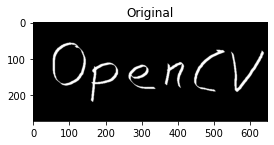

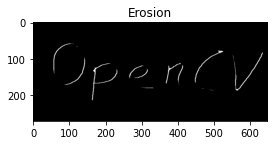

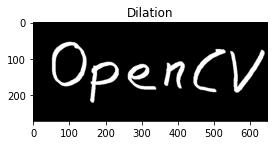

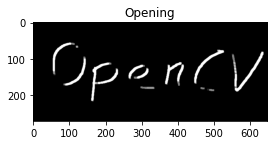

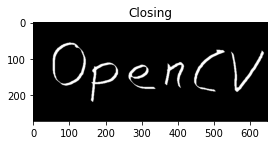

In [2]:
image = cv2.imread('images/opencv_inv.png', 0)
imshow('Original', image)

# Let's define our kernel size
kernel = np.ones((5,5), np.uint8)

# Now we erode
erosion = cv2.erode(image, kernel, iterations = 1)
imshow('Erosion', erosion)

# Dilate here
dilation = cv2.dilate(image, kernel, iterations = 1)
imshow('Dilation', dilation)

# Opening - Good for removing noise
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
imshow('Opening',opening)

# Closing - Good for removing noise
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
imshow('Closing',closing)

# Canny Edge Detaction
![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/Screenshot%202021-11-15%20at%205.24.15%20pm.png)

- 첫 argument는 입력 이미지
- 2, 3번 arg는 각각 최소, 최대값
- 4번쨰는 aperture_size. 이미지 gradient를 찾기 위한 Sobel kernel. 기본 값은 3

에지 감지에는 에지로 계산되어야 하는 차이/변경 사항을 알려주는 임계값이 필요하다.

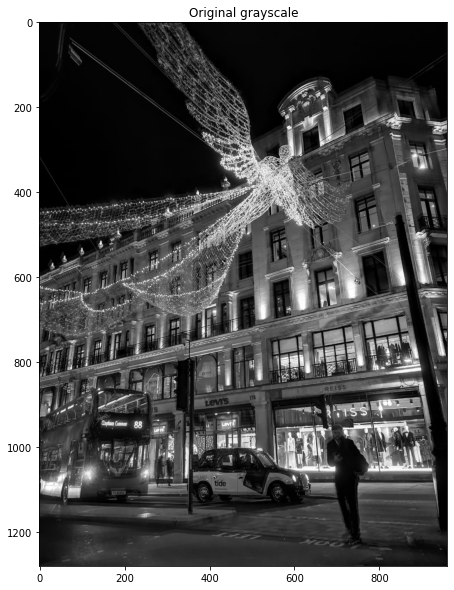

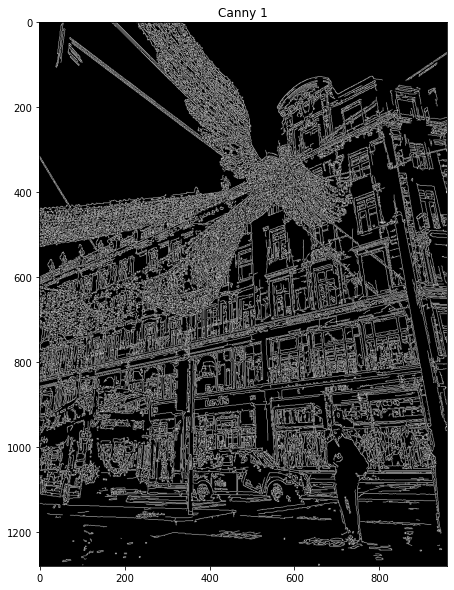

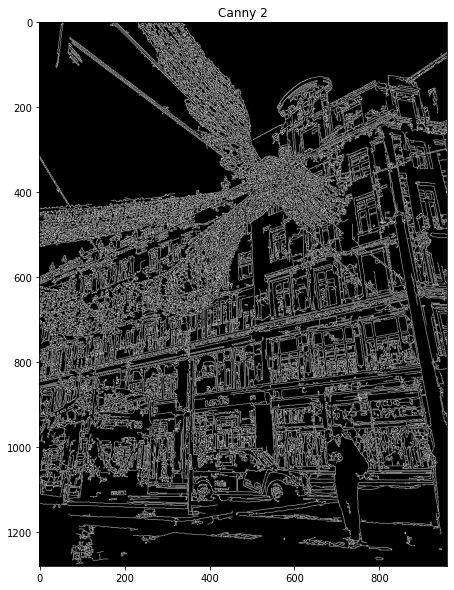

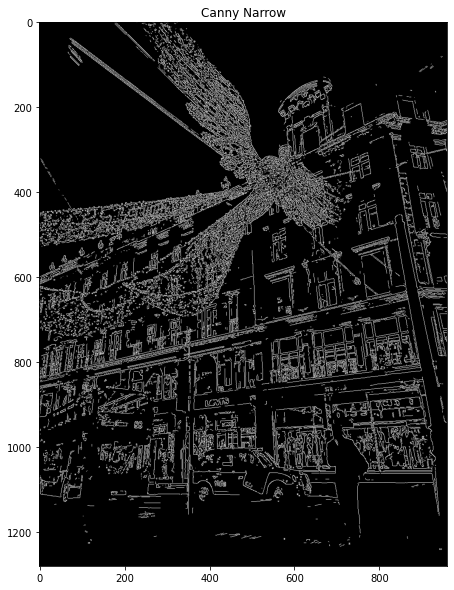

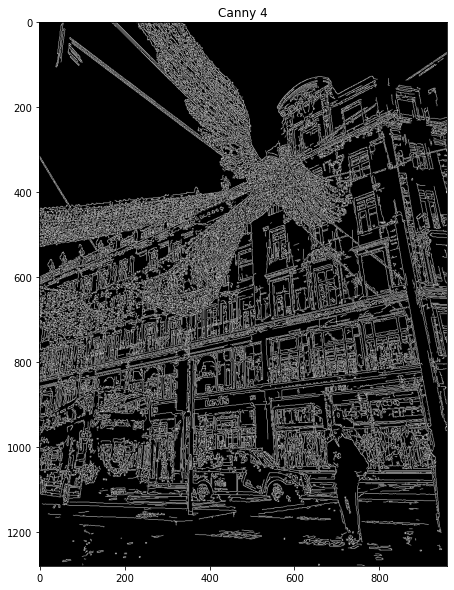

In [9]:
image = cv2.imread('images/londonxmas.jpeg',0)

imshow("Original grayscale", image)

# Canny 엣지 탐지는 gradient 값을 임계값으로 사용함
# 첫 임계값 gradient
canny = cv2.Canny(image, 50, 120)
imshow('Canny 1', canny)

# 넓은 엣지 임계값 범위, 많은 엣지 검출 기대
canny = cv2.Canny(image, 10, 200)
imshow('Canny 2', canny)

# Narrow threshold, expect less edges
# 좁은 임계값 범위, 적은 엣지 탐지
canny = cv2.Canny(image, 200, 240)
imshow('Canny Narrow', canny)

canny = cv2.Canny(image, 60, 110)
imshow('Canny 4', canny)

### Auto Canny

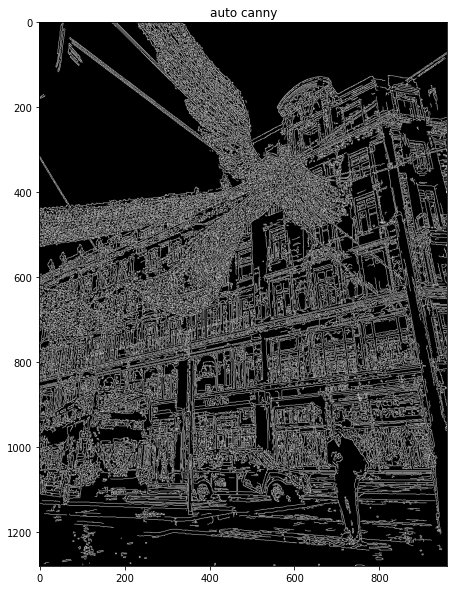

In [11]:
def autoCanny(image):
  # 최선의 임계값을 중간 이미지 픽셀 intensity에 따라 찾아서 적용함
  blurred_img = cv2.blur(image, ksize = (5, 5))
  med_val = np.median(image)
  lower = int(max(0, 0.66 *med_val))
  upper = int(min(255, 1.33 * med_val))
  edges = cv2.Canny(image = image, threshold1 = lower, threshold2 = upper)
  return edges

auto_canny = autoCanny(image)
imshow("auto canny", auto_canny)